In [24]:
import andi
import numpy as np
from tensorflow.keras.models import load_model
import os
AD = andi.andi_datasets()

In [4]:
i = 425
N = 10000
X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = N, tasks = 1, dimensions = 2,
                                             min_T = i, max_T = i+1, load_dataset=False, path_datasets=str(i)+'master2')

Creating a dataset for task(s) 1 and dimension(s) 2.
Generating dataset for dimension 2.


C:\Users\Aykut\Anaconda3\lib\site-packages\fbm\fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "
C:\Users\Aykut\Anaconda3\lib\site-packages\andi\diffusion_models.py:181: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


In [20]:
r = np.array(X1[1]).reshape(N,2,i)       # separate into 2 Dimensions
r = np.diff(r,axis=2)                    # take the differentials
x = r[:,0,:]                             # separate x data
y = r[:,1,:]                             # separate y data



x = (x-np.mean(x,axis=1).reshape(len(x),1)) / np.std(x,axis=1).reshape(len(x),1)   # normalize x data
y = (y-np.mean(y,axis=1).reshape(len(y),1)) / np.std(y,axis=1).reshape(len(y),1)   # normalize y data


In [25]:
network = load_model('Model_1D_recdout_425.h5')

predicted_x = network.predict(x.reshape(len(x),int(i/4),4))
predicted_y = network.predict(y.reshape(len(y),int(i/4),4))

predicted = ( predicted_x + predicted_y ) / 2             

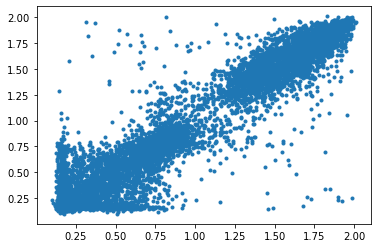

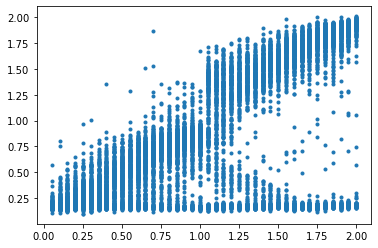

In [33]:
import matplotlib.pyplot as plt
plt.plot(predicted_x, predicted_y,'.')
plt.figure()
plt.plot(Y1[1],predicted_y, '.')

In [35]:
np.mean(np.abs(predicted-Y1[1]))

0.7046744235578543